In [2]:
import glob
f1=glob.glob("../GPM/ORO/VN/2B*HDF5")
print(len(f1))


72


In [31]:
f1=sorted(f1)
import io_subs
import numpy as np
n_tot=0

import xarray as xr

import netCDF4 as nc
dict_cmb={}
pwcL=[]
ntot=0
ifcount=0
pRateL=[]
zCorrectedL=[]  
for fcmb in f1:

    z_meas_L=[]
    p_type_L=[]
    bin_nodes_L=[]
    sfc_bin_L=[]
    p_rate_cmb_L=[]
    dm_L=[]
    bin_zero_deg_L=[]
    bin_storm_top_L=[]
    #print(fcmb,fdpr)
    qv,press,envNodes,airTemp,skTemp,binNodes,pwc,sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,oe_wvp,oe_lwp,oe_iwp,oesfc_precip,stormTop,nearSfcPrecip,zeroDegAltitude,surfaceType=io_subs.readCMB(fcmb)
    with nc.Dataset(fcmb) as fnc:
        precipRate=fnc["KuKaGMI/precipTotRate"][:]
    pType=np.array(pType/1e7,dtype=int)
    a=np.nonzero(np.abs(pType-1.5)<0.6)
    n_tot+=len(a[0])
    b=np.nonzero(zeroDegAltitude[a]>3000)
    #print(a[0].shape)
    for i1,j1 in zip(a[0][b],a[1][b]):
        if binNodes[i1,j1,4]-binNodes[i1,j1,2]>10:
            n1=binNodes[i1,j1,2]-60
            n2=binNodes[i1,j1,2]+10
            if n1>0:
                pwcL.append(pwc[i1,j1,n1:n2])
                pRateL.append(precipRate[i1,j1,n1:n2])
                zCorrectedL.append(zCorrected[i1,j1,n1:n2])
                ntot+=1
    if ifcount%10==0:
        print(fcmb)
        print(ntot)
    ifcount+=1
    #if len(a[0])>0:
    #    write_subset(z_meas_L,p_type_L,bin_nodes_L,sfc_bin_L,p_rate_cmb_L,dm_L,bin_zero_deg_L,bin_storm_top_L,orbit_num)
    #break

../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220501-S011234-E012112.046426.V07A.HDF5
153
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220502-S152139-E153018.046451.V07A.HDF5
573
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220504-S001009-E001847.046472.V07A.HDF5
1173
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220505-S022646-E023210.046489.V07A.HDF5
2798
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220506-S163434-E164103.046514.V07A.HDF5
3496
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220507-S234810-E235647.046534.V07A.HDF5
4508
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220509-S135652-E140531.046559.V07A.HDF5
5235
../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220510-S211231-E212029.046579.V07A.HDF5
6432


In [27]:
print(zCorrected.shape)

(734, 49, 88)


In [13]:
np.savez("pwcL.npz",pwcL=pwcL)

In [32]:
from sklearn.cluster import KMeans
zCorrectedL=np.array(zCorrectedL)
zCorrectedL[zCorrectedL<0]=0
kmeans = KMeans(n_clusters=9, random_state=0).fit(zCorrectedL)

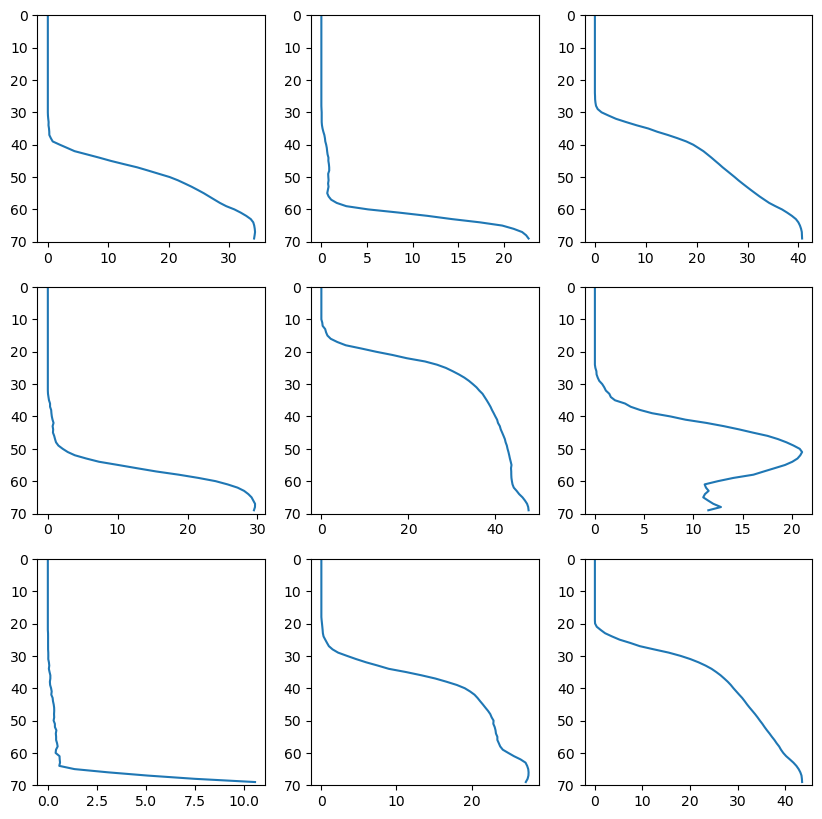

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pRateL=np.array(pRateL)
for i in range(9):
    plt.subplot(3,3,i+1)
    a=np.nonzero(kmeans.labels_==i)
    plt.plot(kmeans.cluster_centers_[i],np.arange(70))
    #plt.plot(np.mean(pRateL[a],axis=0),np.arange(70))
    plt.ylim(70,0)

In [15]:
print(n_pix)
ind_max=np.argmax(n_pix)
print(ind_max)
print(orbs[ind_max])
print(dict_cmb[orbs[ind_max]])
fcmb,fdpr=dict_cmb[orbs[ind_max]][:2]


[6015, 2600, 690, 2024, 753, 1, 2808, 6000, 0, 305, 950, 91, 200, 1790, 5343, 188, 55, 6, 24, 217, 2204, 721, 0, 3326, 2030, 4, 168, 6, 1903, 5021, 0, 117, 31, 5, 5362, 171, 5039, 717, 2459, 2, 598, 0, 4321, 3149, 0, 1285, 127, 1124, 29, 4011, 3145, 124, 191, 0, 3877, 2232, 3771, 1559, 3573, 1750, 281, 955, 0, 886, 1527, 1309, 1164, 2, 6, 121, 6732, 339]
70
46579
['../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220510-S211231-E212029.046579.V07A.HDF5', '../GPM/ORO/VN/2A-CS-CONUS.GPM.DPR.V9-20211125.20220510-S211231-E212029.046579.V07A.HDF5', 6732]


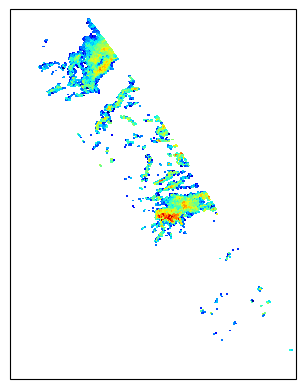

In [ ]:
qv,press,envNodes,airTemp,skTemp,binNodes,pwc,sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,oe_wvp,oe_lwp,oe_iwp,oesfc_precip,stormTop,nearSfcPrecip,zeroDegAltitude,surfaceType=io_subs.readCMB(fcmb)
import matplotlib.pyplot as plt
plt.figure()
import cartopy.crs as ccrs
ax=plt.subplot(111,projection=ccrs.PlateCarree())
import matplotlib.colors as mcolors
plt.pcolormesh(lon[300:600],lat[300:600],nearSfcPrecip[300:600],cmap="jet",norm=mcolors.LogNorm())
